### Imports

In [ ]:
!pip install -r ./../requirements.txt

In [1]:
%load_ext autoreload
%autoreload 2

import os

import numpy as np
import pandas as pd

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from data_management import data_loading, random_sampling, joint_random_sampling
from plotting import color_plot, plot3d_dataset, plot_target_classes
from model_evaluation import evaluate_classifiers, evaluation_pipeline, get_number_of_samples_table

np.random.seed(777)

### Data loading

In [2]:
energy_threshold = 0.75
use_cone = False

manip_features = data_loading('cwt', energy_threshold, use_cone)

### Select Manipulation Category

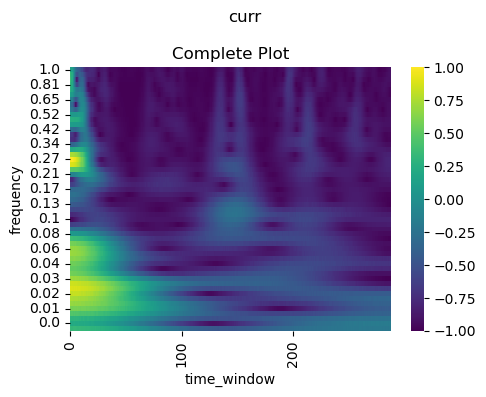

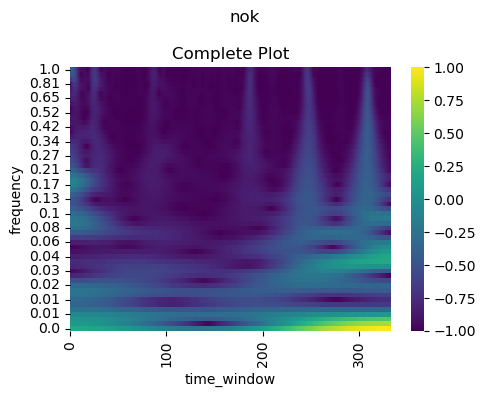

In [3]:
manip_category = 'wash_trade'

manip_stocks_dict = manip_features[manip_category]
for stock, stock_features in manip_stocks_dict.items():
    feature_matrix = stock_features['feature_matrix']
    color_plot(feature_matrix, 1, 5, use_cone, stock, mask_index=6)

In [4]:
stock = 'curr'
plot_against = 'frequency'
hue_var = 'target'
feature_matrix = manip_stocks_dict[stock]['feature_matrix']

plot3d_dataset(feature_matrix, stock, plot_against, hue_var, target_var=feature_matrix[:, -1])

### Random Sampling and Splitting

In [5]:
X_train_all, y_train, X_val_all, y_val, X_test_all, y_test = joint_random_sampling(manip_stocks_dict, 0.6, 0.5, 'uniform')

# Characteristics filtering
X_train = X_train_all[:, [1, 2, 3]]
X_val = X_val_all[:, [1, 2, 3]]
X_test = X_test_all[:, [1, 2, 3]]

### Distribution Visualization

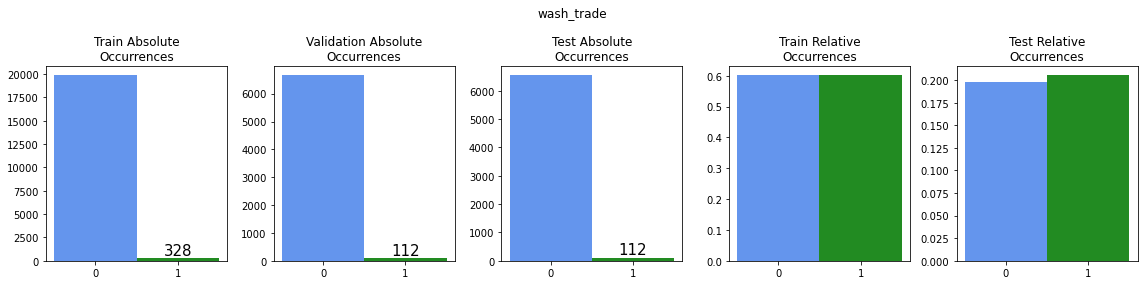

In [6]:
plot_target_classes(y_train, y_val, y_test, manip_category)

In [7]:
stock = 'curr'
plot_against = 'frequency'
hue_var = 'target'

plot3d_dataset(X_test_all, stock, plot_against, hue_var, target_var=y_test)

### Model Benchmarking

In [8]:
gen_train_error_pair = [(0.1, 0.05), (0.05, 0.025), (0.015, 0.0075)]

get_number_of_samples_table(gen_train_error_pair, 3, depth=3, pol_degree=3)

,logistic_regression,svm_linear,svm_polynomial,svm_rbf,decision_tree
"(epsilon, delta)",,,,,
"(0.1, 0.05)",44.0,44.0,54.0,inf,766.0
"(0.05, 0.025)",102.0,102.0,122.0,inf,3159.0
"(0.015, 0.0075)",419.0,419.0,487.0,inf,36949.0


In [17]:
sampling_mode = 'joint'
distribution = 'uniform'

classifiers = ['logistic_regression', 'svm_linear', 'svm_polynomial', 'decision_tree', 'svm_rbf']
depth = 3
pol_degree = 3

In [23]:
gen_error, train_error = gen_train_error_pair[0]

for classifier in classifiers:

    _ = evaluation_pipeline(manip_stocks_dict, 3, classifier, gen_error, train_error, sampling_mode,
                                    depth=depth, distribution=distribution, pol_degree=pol_degree)

0.1310342773757408% are required. The training procedure is adequate.
108 of the data are used for training.
16762 of the data are used for validation.
16709 of the data are used for testing.
logistic_regression
Label 0.0 -> Train error 0.018518518518518517, Val error 0.015749910511872092, Test error 0.016757436112274822
Label 1.0 -> Train error 0.018518518518518517, Val error 0.015749910511872092, Test error 0.016757436112274822
0.1310342773757408% are required. The training procedure is adequate.
108 of the data are used for training.
16762 of the data are used for validation.
16709 of the data are used for testing.
svm_linear
Label 0.0 -> Train error 0.018518518518518517, Val error 0.015511275504116453, Test error 0.016996828056735892
Label 1.0 -> Train error 0.018518518518518517, Val error 0.015511275504116453, Test error 0.016996828056735892
0.16081479496113643% are required. The training procedure is adequate.
108 of the data are used for training.
16762 of the data are used for 

In [24]:
gen_error, train_error = gen_train_error_pair[1]

for classifier in classifiers:

    _ = evaluation_pipeline(manip_stocks_dict, 3, classifier, gen_error, train_error, sampling_mode,
                                    depth=depth, distribution=distribution, pol_degree=pol_degree)

0.3037612793710355% are required. The training procedure is adequate.
163 of the data are used for training.
16762 of the data are used for validation.
16654 of the data are used for testing.
logistic_regression
Label 0.0 -> Train error 0.012269938650306749, Val error 0.01795728433361174, Test error 0.014591089227813138
Label 1.0 -> Train error 0.012269938650306749, Val error 0.01795728433361174, Test error 0.014591089227813138
0.3037612793710355% are required. The training procedure is adequate.
163 of the data are used for training.
16762 of the data are used for validation.
16654 of the data are used for testing.
svm_linear
Label 0.0 -> Train error 0.006134969325153374, Val error 0.016525474287077915, Test error 0.016092230094872102
Label 1.0 -> Train error 0.006134969325153374, Val error 0.016525474287077915, Test error 0.016092230094872102
0.36332231454182673% are required. The training procedure is adequate.
216 of the data are used for training.
16709 of the data are used for va

In [25]:
gen_error, train_error = gen_train_error_pair[2]

for classifier in classifiers:

    _ = evaluation_pipeline(manip_stocks_dict, 3, classifier, gen_error, train_error, sampling_mode,
                                    depth=depth, distribution=distribution, pol_degree=pol_degree)

1.247803686828077% are required. The training procedure is adequate.
487 of the data are used for training.
16546 of the data are used for validation.
16546 of the data are used for testing.
logistic_regression
Label 0.0 -> Train error 0.014373716632443531, Val error 0.016318143357911277, Test error 0.016257705789919013
Label 1.0 -> Train error 0.014373716632443531, Val error 0.016318143357911277, Test error 0.016257705789919013
1.247803686828077% are required. The training procedure is adequate.
487 of the data are used for training.
16546 of the data are used for validation.
16546 of the data are used for testing.
svm_linear
Label 0.0 -> Train error 0.012320328542094456, Val error 0.016680768765864863, Test error 0.015955517949957695
Label 1.0 -> Train error 0.012320328542094456, Val error 0.016680768765864863, Test error 0.015955517949957695
1.4503112064087673% are required. The training procedure is adequate.
540 of the data are used for training.
16546 of the data are used for val